# Extract the PSF  some stars in HD163466 Y4 field
=====================================================================

- Creation : Friday 2016 July 7th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 with Y4


## 1) Import package

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [105]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [106]:
#photutils.test()

In [107]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [108]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [109]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-07-07 21:16:13.345970
fits date format for the analysis :  2016-07-07T21:16:13


## 3) Configuration of the input file



In [110]:

object_name='HD163466_y4'

In [111]:
path='./HD163466_y4'
basefilename='AssScImHD163466_y4_3.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [112]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

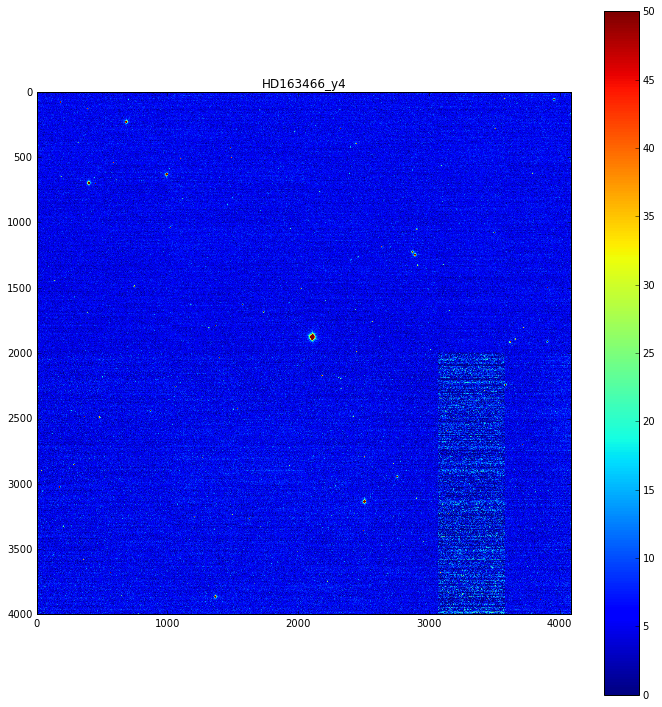

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [114]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [115]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 5.2523830140796726)
('median rms = ', 2.3741860013970868)


### Radiography of the residual background

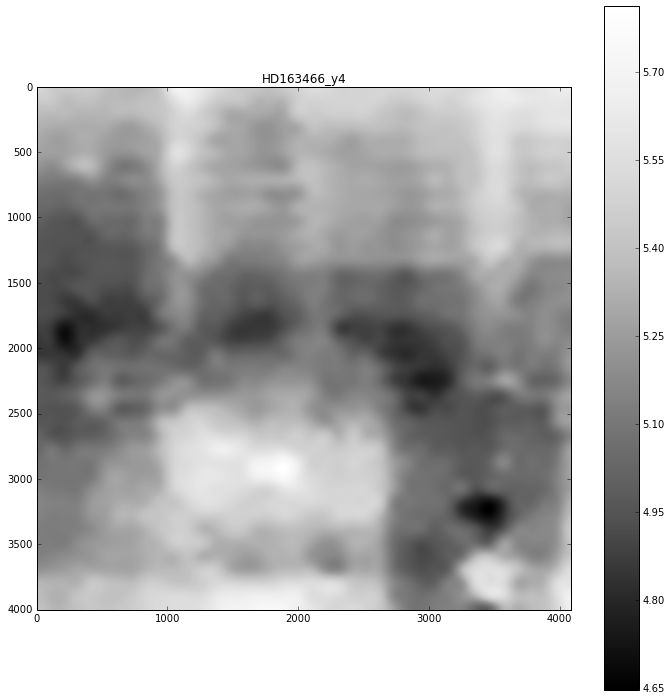

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [117]:
data2=data - bkg.background

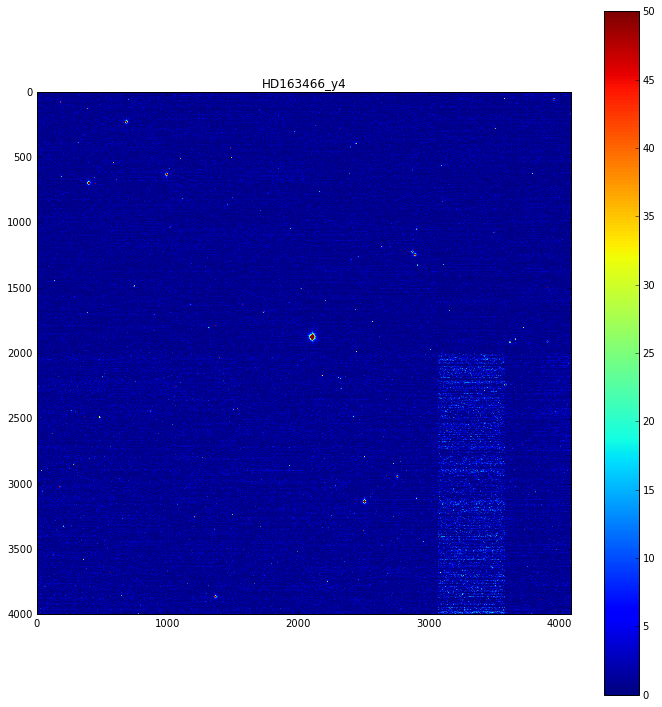

In [118]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [119]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(0.035955808367848292, 0.020932758347481872, 2.8787911971082023)


In [120]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      flux            mag        
--- ------------- ------------- ... ------------- ------------------
 22 553.947921002 3680.49183545 ... 1.00080069606 -0.000868996842961
 16 1059.27025608 2259.02262875 ... 1.19514138311    -0.193548211476
 18 283.695978515 2854.95418942 ... 1.20786856273    -0.205049195009
 10  1730.0400246 1688.33785241 ... 1.35901103976    -0.333057461712
  2 180.100870243 83.6719918128 ...  1.5170944131    -0.452531522518
  9 1570.72126539 1631.22614027 ... 1.53901335999    -0.468105974768
 14 2176.64362782 2175.18104185 ... 1.55410997457    -0.478704369589
 13 3614.46532614 1918.76605528 ... 1.60111604949    -0.511057027215
 12 3899.96394336 1915.30192375 ...  1.6112679894    -0.517919447942
  8  742.16459089 1491.46379704 ... 1.63232221527    -0.532014728109
...           ...           ... ...           ...                ...
  1 3950.96968488 63.6485136134 ... 3.13884311064     -1.24192402206
  6 2868.49630385 1228.57745143 ..

In [121]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
22,553.947921002,3680.49183545,0.797072140863,0.422817684899,-0.610364164447,25.0,0.0,179.135610635,1.00080069606,-0.000868996842961
16,1059.27025608,2259.02262875,0.3753710995,-0.0728223753243,0.00659329065033,25.0,0.0,326.310612663,1.19514138311,-0.193548211476
18,283.695978515,2854.95418942,0.487739960106,0.39052173717,0.157648714819,25.0,0.0,342.017218425,1.20786856273,-0.205049195009
10,1730.0400246,1688.33785241,0.449874803956,-0.240445768955,-0.112485305534,25.0,0.0,356.619356902,1.35901103976,-0.333057461712
2,180.100870243,83.6719918128,0.412302151075,0.0221457951213,0.091387210872,25.0,0.0,411.571849121,1.5170944131,-0.452531522518
9,1570.72126539,1631.22614027,0.453814648696,-0.173579416357,-0.3230934161,25.0,0.0,410.731241352,1.53901335999,-0.468105974768
14,2176.64362782,2175.18104185,0.386736669229,-0.204544236998,-0.0737474407514,25.0,0.0,419.366761228,1.55410997457,-0.478704369589
13,3614.46532614,1918.76605528,0.405319056064,-0.437470683521,-0.318333380301,25.0,0.0,453.456805897,1.60111604949,-0.511057027215
12,3899.96394336,1915.30192375,0.403046989692,-0.471178264993,-0.159282877771,25.0,0.0,444.474890195,1.6112679894,-0.517919447942


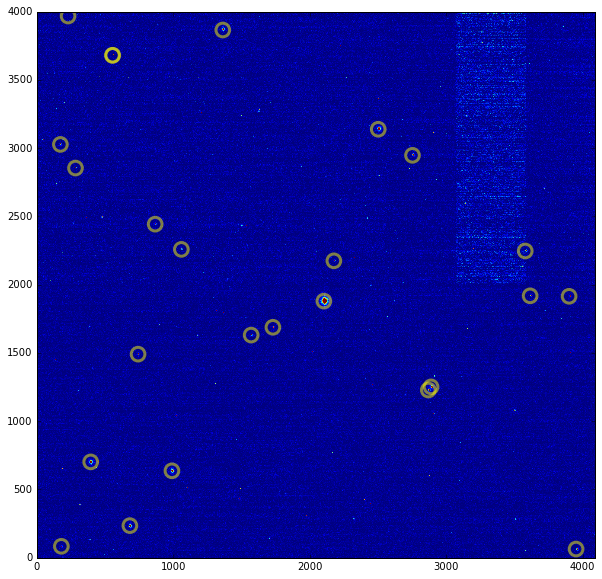

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [123]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)



selected_stars=sources.as_array()
NBFOUNDSTARS=np.min([NBSTARS,selected_stars.shape[0]])

for istar in range(NBFOUNDSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

553.0 3680.0
1059.0 2259.0
283.0 2854.0
1730.0 1688.0
180.0 83.0
1570.0 1631.0
2176.0 2175.0
3614.0 1918.0
3899.0 1915.0
742.0 1491.0
867.0 2443.0
557.0 3681.0
173.0 3027.0
229.0 3968.0
3950.0 63.0
2868.0 1228.0
3578.0 2247.0
2752.0 2948.0
1362.0 3866.0
2888.0 1251.0
990.0 636.0
682.0 235.0
2501.0 3139.0
395.0 702.0
2103.0 1880.0


## Work with one PSF of one star

In [150]:
# Extract the plot of a PSF
index=1

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


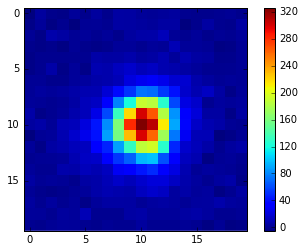

In [151]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

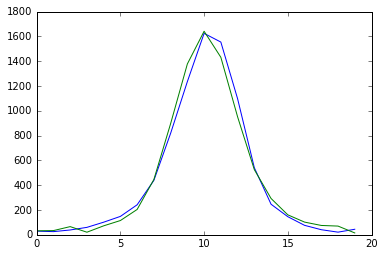

In [152]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [153]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [154]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [155]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(10.074894110645413, 2.6136603800427238)

In [156]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(10.128274162504995, 2.6642571453862196)

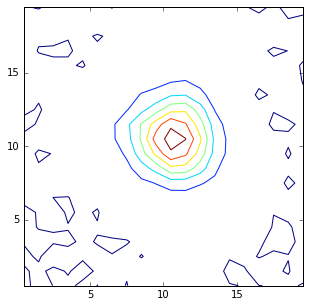

In [157]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [132]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [133]:
weighted_avg_and_std(Xgrid,onepsf2)

(-0.081076241251159989, 2.3354626761714123)

In [134]:
weighted_avg_and_std(Ygrid,onepsf2)

(0.47791649966189387, 0.71738612975401117)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [135]:
import photutils.psf 
from photutils.psf import psf_photometry

In [136]:
from astropy.modeling import models, fitting

In [137]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [138]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


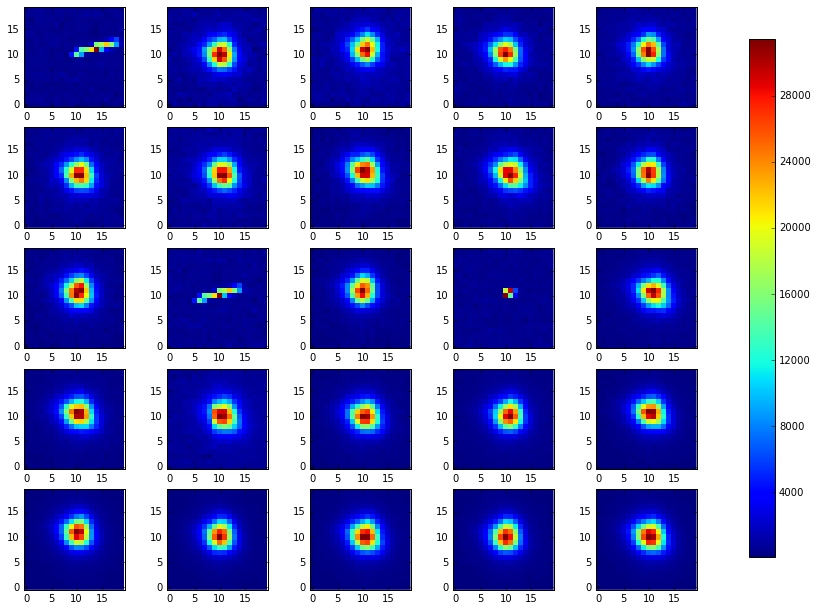

In [139]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBFOUNDSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [140]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


In [141]:
SIGMAX_OF_STARS

array([ 2.6300091 ,  2.61366038,  2.61235076,  2.78946231,  2.63610704,
        2.64452857,  2.74827884,  2.73821395,  2.83937762,  2.62806988,
        2.62386056,  2.33546268,  2.61401995,  1.03882994,  2.77458423,
        2.81452597,  2.57525191,  2.75271808,  2.6610264 ,  2.75305338,
        2.63137208,  2.62424976,  2.7108856 ,  2.61454287,  2.72470088])

In [142]:
SIGMAY_OF_STARS

array([        nan,  2.66425715,  2.73087302,  2.68996188,  2.70170922,
        2.6632995 ,  2.72551659,  2.69040188,  2.77418384,  2.68020458,
        2.66544234,  0.71738613,  2.66338049,  1.84889007,  2.72239716,
        2.7456882 ,  2.67194863,  2.72630591,  2.7188407 ,  2.69943196,
        2.68566212,  2.68640907,  2.7049426 ,  2.68385492,  2.69111814])

#### Cut NAN

In [143]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [144]:
all_sigx=all_sigx[all_sigx>2.0]
all_sigy=all_sigy[all_sigy>2.0]

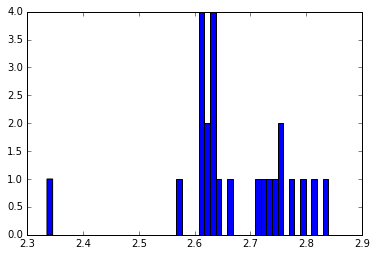

In [145]:
h1=plt.hist(all_sigx,50)

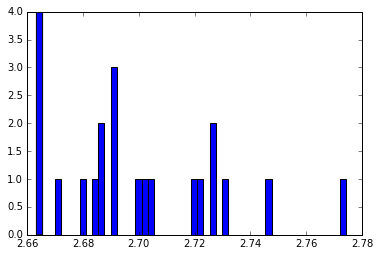

In [146]:
h1=plt.hist(all_sigy,50)

In [147]:
all_sigx.mean()

2.6704296990976335

In [148]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 2.67 +/- 0.10 pixels ==> psf  2.52 +/- 0.09 arcsec 
average prf(y) = 2.70 +/- 0.03 pixels ==> psf  2.55 +/- 0.03 arcsec 


In [149]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 2.64 +/- 0.10 pixels ==> psf  2.49 +/- 0.09 arcsec 
average prf(y) = 2.69 +/- 0.03 pixels ==> psf  2.54 +/- 0.03 arcsec 
